In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

/Users/cameronhenshaw/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
df = pd.read_csv('2022-02-20-stays_summary.csv')

In [3]:
df.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
0,12525,"PHILLIPS, TIFFANY ANN",F,W,2022-01-13,2022-01-13,1,-1,-1,1,NaN,NaN
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5,-1,2,0,NaN,NaN
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3,11,12,0,NaN,NaN
3,19278,"HODGES, RICHARD SCOTT",M,W,2022-01-28,2022-01-29,2,2,4,0,NaN,NaN
4,9808,"LOOPER, REGINALD ALAN",M,B,2022-01-07,2022-01-24,18,-1,-1,1,NaN,NaN


In [43]:
df.groupby(['race', 'gender']).size()

race  gender
A     F           1
      M           1
B     F          13
      M          56
I     M           1
W     F          87
      M         291
dtype: int64

In [46]:
(13+87+1)/(13+87+56+291+2)

0.22494432071269488

In [44]:
13/(56+13)

0.18840579710144928

In [45]:
87/(87+291)

0.23015873015873015

Women make up 22% of the dataset; Black women make up 19% of their race group, white women make up 23% of their race group.

In [47]:
291/(13+87+56+291+2)

0.6481069042316259

## Entire Population Distribution

[Text(0, 0.5, 'Count of Defendents'),
 Text(0.5, 0, 'Number of days in jail'),
 Text(0.5, 1.0, 'Entire Population')]

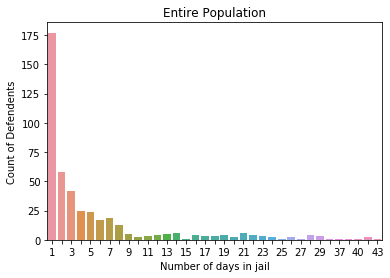

In [4]:
ax = sns.countplot(x='days', data=df)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set(xlabel='Number of days in jail', ylabel='Count of Defendents',  title='Entire Population')


Below, I'm plotting the distributions of different groups, just to see if anything stands out.

## Female Population Distribution

In [5]:
dfFemale = df[df['gender']=='F']
dfMale = df[df['gender']=='M']

[Text(0, 0.5, 'Count of Defendents'),
 Text(0.5, 0, 'Number of days in jail'),
 Text(0.5, 1.0, 'Female Population')]

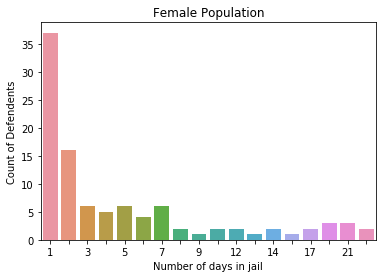

In [6]:
ax = sns.countplot(x='days', data=dfFemale)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set(xlabel='Number of days in jail', ylabel='Count of Defendents', title='Female Population')


## Male Population Distribution

[Text(0, 0.5, 'Count of Defendents'),
 Text(0.5, 0, 'Number of days in jail'),
 Text(0.5, 1.0, 'Male Population')]

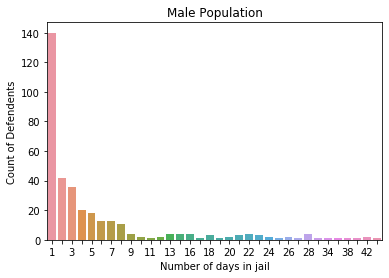

In [7]:
ax = sns.countplot(x='days', data=dfMale)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set(xlabel='Number of days in jail', ylabel='Count of Defendents',  title='Male Population')


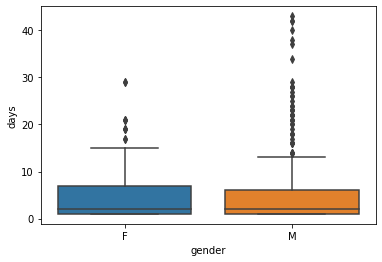

In [8]:
ax = sns.boxplot(x="gender", y="days", data=df)

## White Population Distribution

In [9]:
df['race'].unique()

array(['W', 'B', 'A', 'I'], dtype=object)

In [10]:
dfWhite = df[df['race']=='W']
dfBlack = df[df['race']=='B']

[Text(0, 0.5, 'Count of Defendents'), Text(0.5, 0, 'Number of days in jail')]

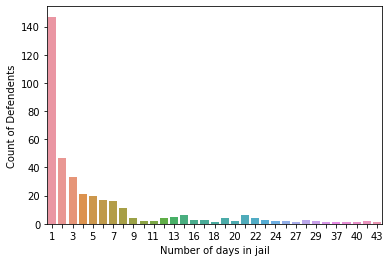

In [11]:
ax = sns.countplot(x='days', data=dfWhite)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set(xlabel='Number of days in jail', ylabel='Count of Defendents')


## Black Population Distribution

[Text(0, 0.5, 'Count of Defendents'), Text(0.5, 0, 'Number of days in jail')]

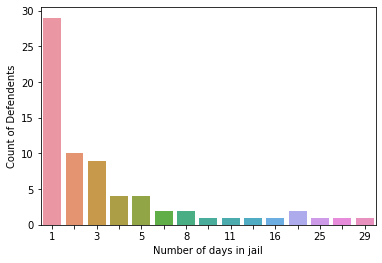

In [12]:
ax = sns.countplot(x='days', data=dfBlack)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set(xlabel='Number of days in jail', ylabel='Count of Defendents')


## Box and Whisker

In [13]:
dfBW = df[(df['race']=='W') | (df['race']=='B')]
dfIA = df[(df['race']=='I') | (df['race']=='A')]

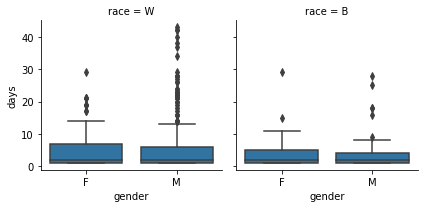

In [14]:
g = sns.FacetGrid(dfBW, col="race")
g.map(sns.boxplot,'gender',  "days", order=["F", "M"])

In [15]:
dfIA.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
36,20044,"GLOSSER, CARMEN LICY",F,A,2022-01-29,2022-01-30,2,2,2,0,NaN,NaN
293,25914,"MERZLAK, THOMAS JOHN",M,I,2022-02-11,2022-02-17,7,1,4,0,NaN,NaN
363,22546,"YANG, PHIA",M,A,2022-02-04,2022-02-04,1,1,5,0,NaN,NaN


Only 3 people are not Black or white, so I'm unable make graphs of the other race groups.

## Other (in progress)

In [16]:
df.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
0,12525,"PHILLIPS, TIFFANY ANN",F,W,2022-01-13,2022-01-13,1,-1,-1,1,NaN,NaN
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5,-1,2,0,NaN,NaN
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3,11,12,0,NaN,NaN
3,19278,"HODGES, RICHARD SCOTT",M,W,2022-01-28,2022-01-29,2,2,4,0,NaN,NaN
4,9808,"LOOPER, REGINALD ALAN",M,B,2022-01-07,2022-01-24,18,-1,-1,1,NaN,NaN


In [17]:
df['min_level'].unique()

array([-1, 11,  2,  1, -3,  6,  3,  5,  4,  9])

In [18]:
df['max_level'].unique()

array([-1,  2, 12,  4,  6,  1,  5,  3,  7, -3,  8, 11,  9, 10])

In [19]:
df['has_violation'].unique()

array([1, 0])

In [21]:
df.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
0,12525,"PHILLIPS, TIFFANY ANN",F,W,2022-01-13,2022-01-13,1,-1,-1,1,NaN,NaN
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5,-1,2,0,NaN,NaN
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3,11,12,0,NaN,NaN
3,19278,"HODGES, RICHARD SCOTT",M,W,2022-01-28,2022-01-29,2,2,4,0,NaN,NaN
4,9808,"LOOPER, REGINALD ALAN",M,B,2022-01-07,2022-01-24,18,-1,-1,1,NaN,NaN


In [25]:
dfExploded = df.explode(['race', 'gender'])
dfExploded.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
0,12525,"PHILLIPS, TIFFANY ANN",F,W,2022-01-13,2022-01-13,1,-1,-1,1,NaN,NaN
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5,-1,2,0,NaN,NaN
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3,11,12,0,NaN,NaN
3,19278,"HODGES, RICHARD SCOTT",M,W,2022-01-28,2022-01-29,2,2,4,0,NaN,NaN
4,9808,"LOOPER, REGINALD ALAN",M,B,2022-01-07,2022-01-24,18,-1,-1,1,NaN,NaN


I was going to look into correlations between race/gender/max_level/has_violation, but I need to go read up on some stats first

## White males

In [48]:
dfWM = df[(df['race']=='W') & (df['gender']=='M')]

In [49]:
dfWM.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5,-1,2,0,NaN,NaN
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3,11,12,0,NaN,NaN
3,19278,"HODGES, RICHARD SCOTT",M,W,2022-01-28,2022-01-29,2,2,4,0,NaN,NaN
5,16245,"BECKER, TIMOTHY CALEB",M,W,2022-01-22,2022-01-27,6,-1,6,0,NaN,NaN
7,14977,"FAIRCHILD, JEFFREY LEWIS",M,W,2022-01-19,2022-01-19,1,1,1,0,NaN,NaN


idea- take a look at level/has_violation distributions